In [1]:
from K_means import *
from dataset import *
from GMM import *
from DBSCAN import *

In [2]:
data = get_data('clustering.csv')

    K-means

In [3]:
tolerance = 0.001
max_iter = 20
inertia_values = []
K_values = range(2,20)
models_kmeans= {}


In [4]:

for k in K_values:
    model = K_means(k, tolerance, max_iter)
    clusters, centroids = model.set_clusters(data)
    inertia = model.inertia(data)
    models_kmeans[k] = {'clusters': clusters, 'centroids': centroids, 'inertia': inertia}
    inertia_values.append(inertia)


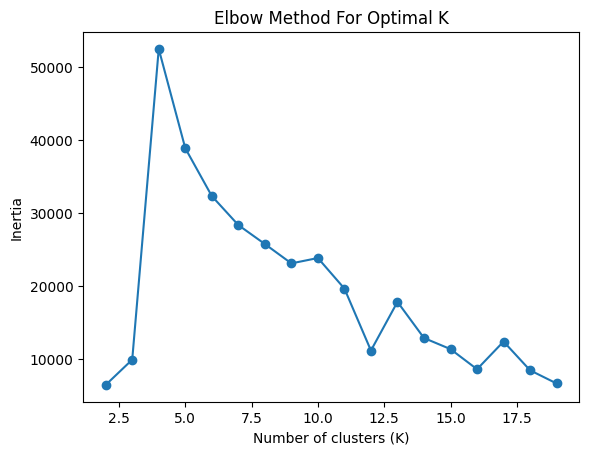

In [5]:

Kmeans_inertia(K_values, inertia_values)


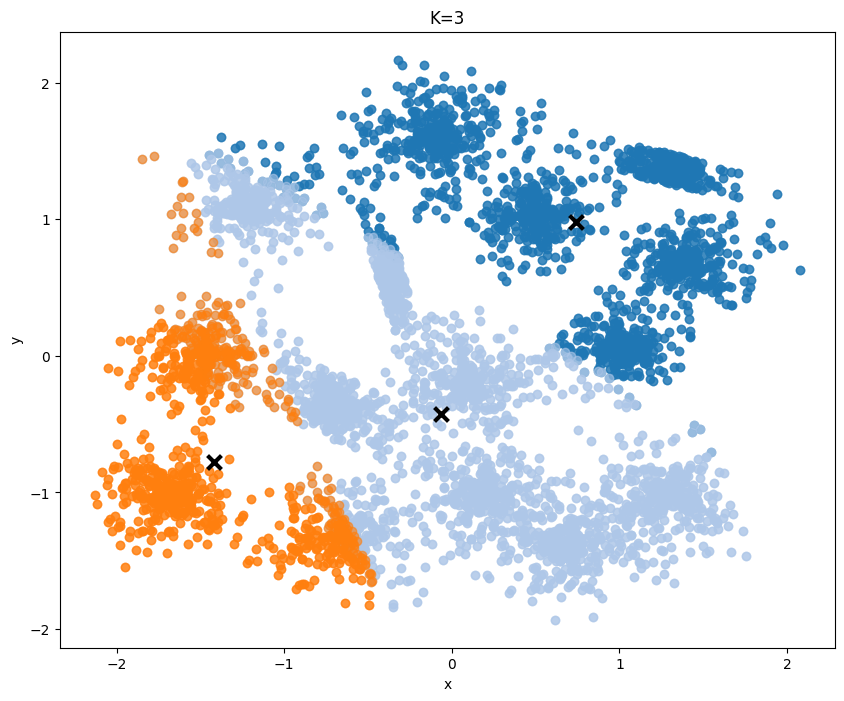

In [6]:

Kmeans_plot_clusters(models_kmeans[3],3)


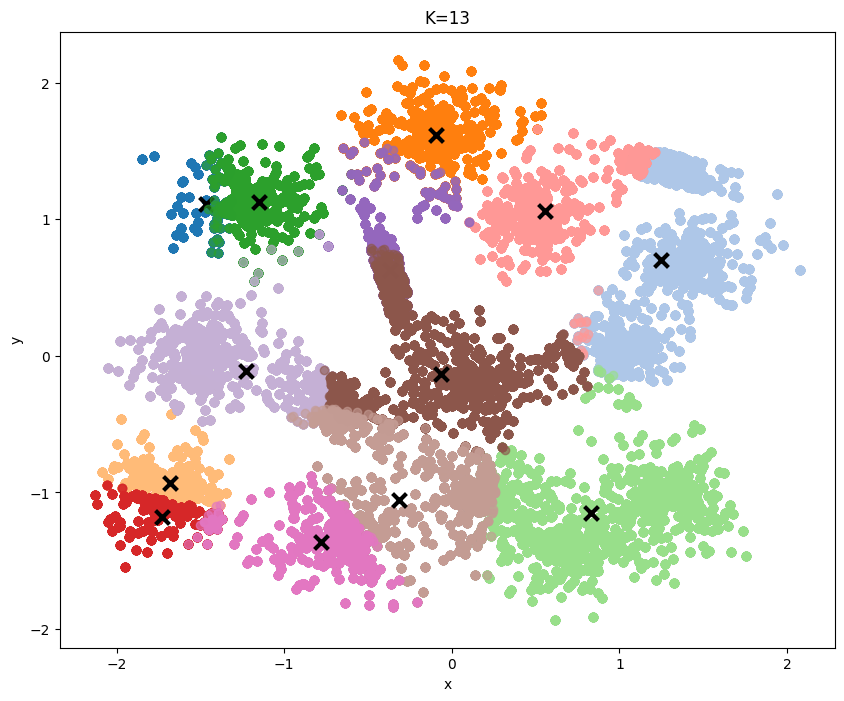

In [7]:

Kmeans_plot_clusters(models_kmeans[13],13)


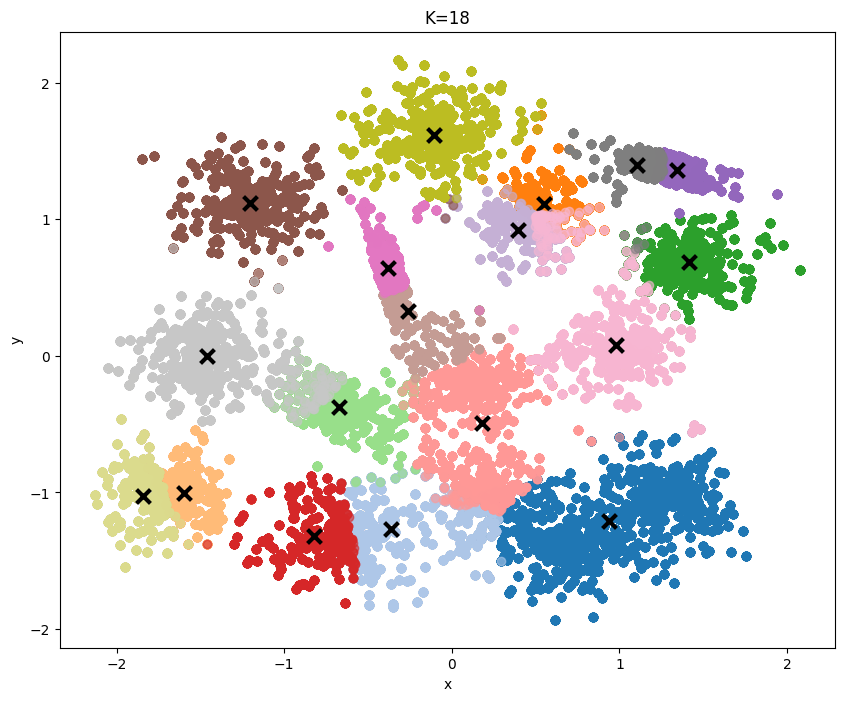

In [24]:

Kmeans_plot_clusters(models_kmeans[18],18)

    GAUSSIAN MIXTURE MODEL 

In [9]:

models_gmm = {}
inertias = {}
for k in K_values:
    model = GMM(k, 50)
    log_likelihoods = model.Train(data,max_iter,0.001)
    clusters = model.set_clusters(data)
    mu = [np.mean(cluster, axis=0) for cluster in clusters.values()]
    sigma = [np.cov(np.array(cluster).T) for cluster in clusters.values()]
    models_gmm[k] = [clusters, mu, sigma]
    inertias[k]= calculate_inertia(clusters)



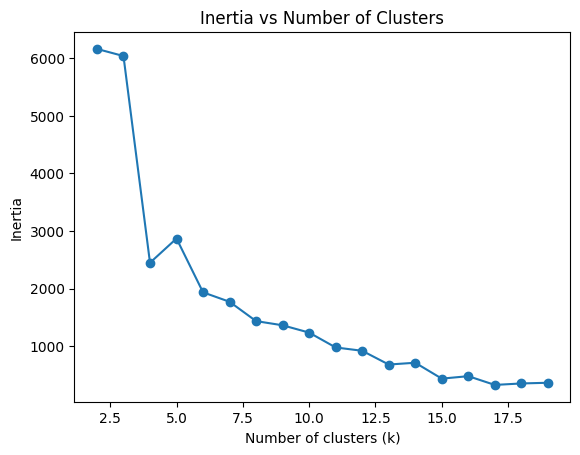

In [10]:
GMM_inertia(inertias)


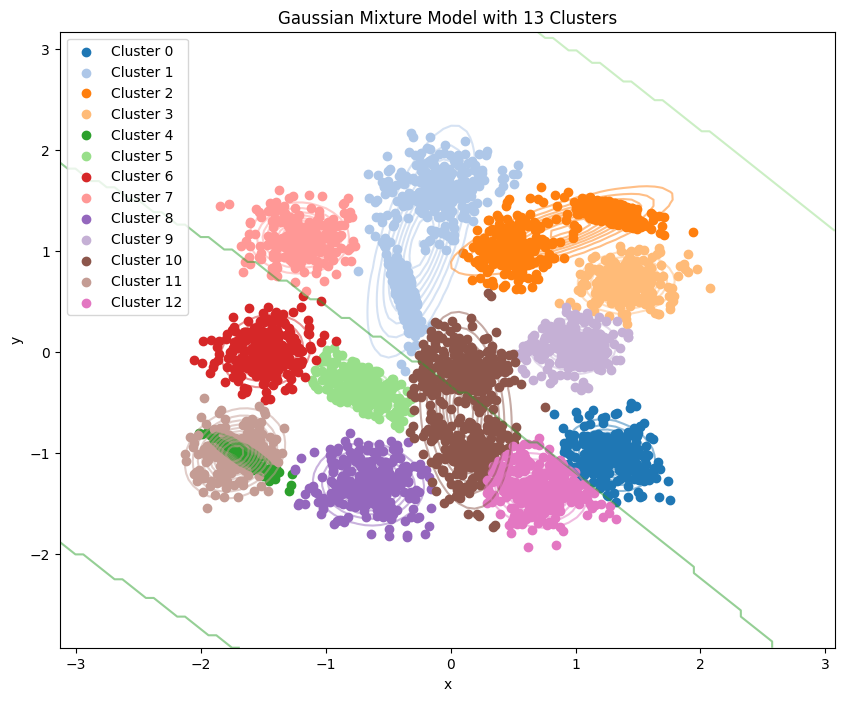

In [22]:
plot_models(models_gmm[13], data, 13)


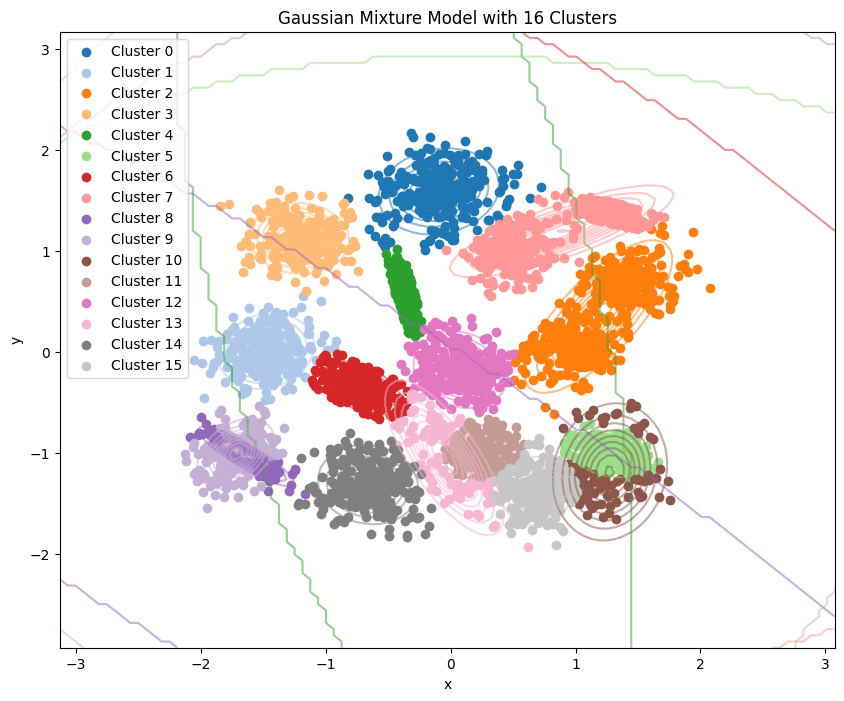

In [23]:

plot_models(models_gmm[15], data, 15)



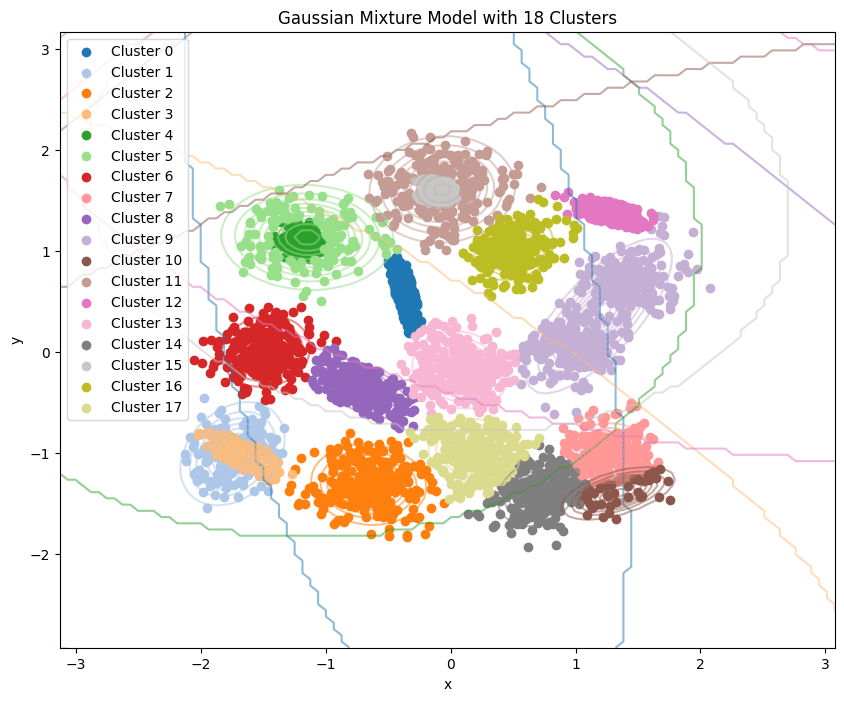

In [21]:

plot_models(models_gmm[18], data, 18)

    DBSCAN 
    

In [12]:
eps_values = [0.01,0.05,0.07,0.9,0.1]
K_values = [4,8,12,15]
inertias = {}
models = []


In [13]:

for eps in eps_values:
    for K in K_values:
        dbscan = DBSCAN(eps=eps, K=K)
        clusters = dbscan.fit_predict(data)
        models.append((eps, K, clusters))
        inertias[(eps, K)] = calculate_inertia(clusters)

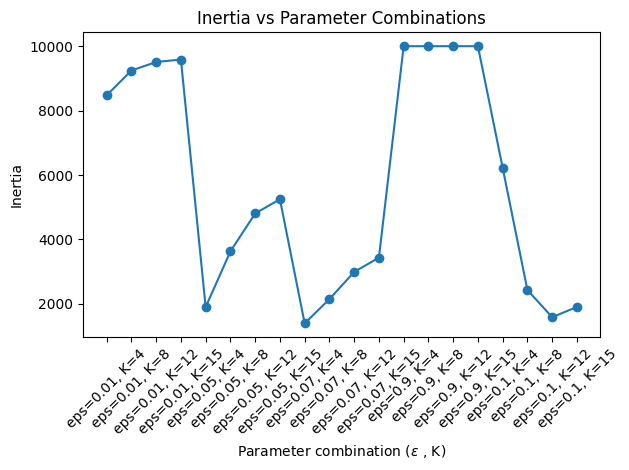

In [14]:

DBSCAN_inertia(inertias)


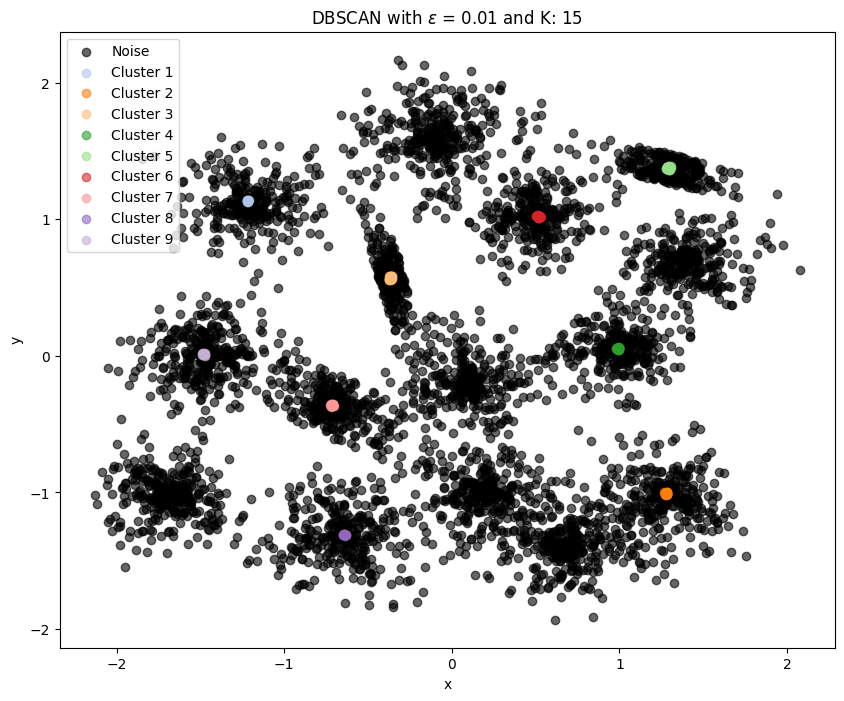

In [15]:
eps, K, clusters = models[3]
plot_clusters(clusters,eps,K)

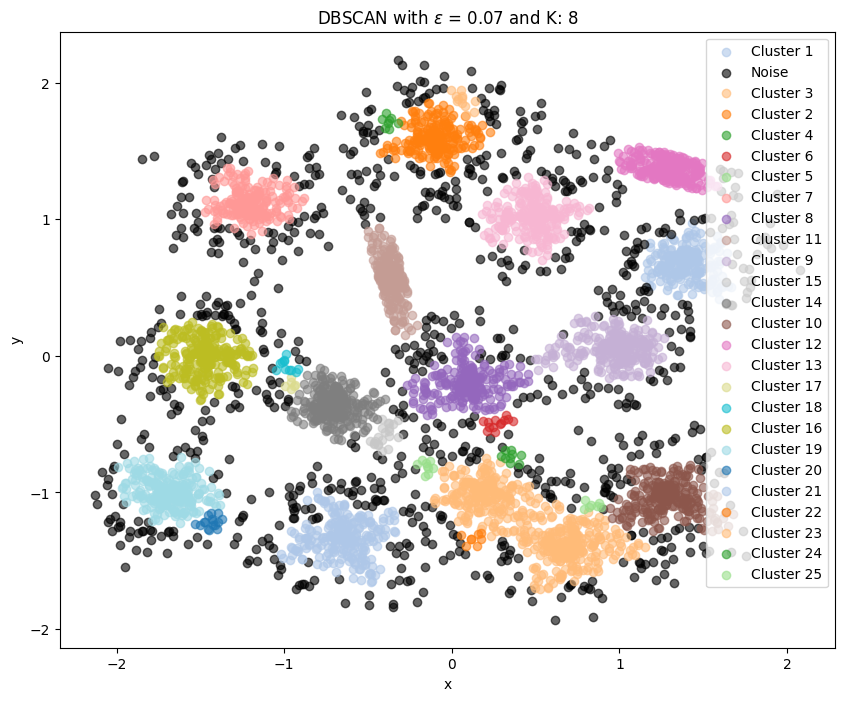

In [16]:
eps, K, clusters = models[9]
plot_clusters(clusters,eps,K)

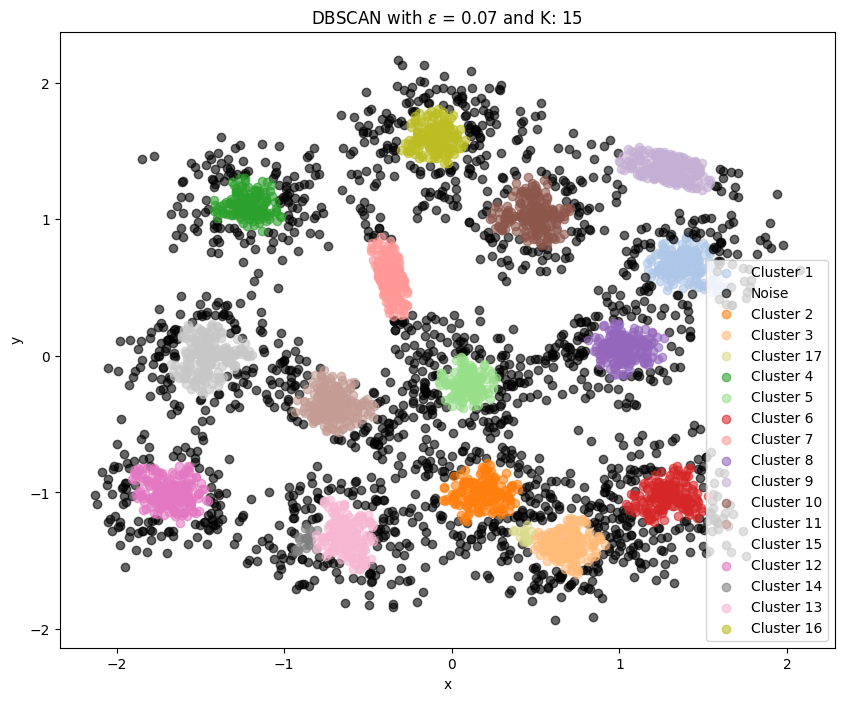

In [17]:
eps, K, clusters = models[11]
plot_clusters(clusters,eps,K)

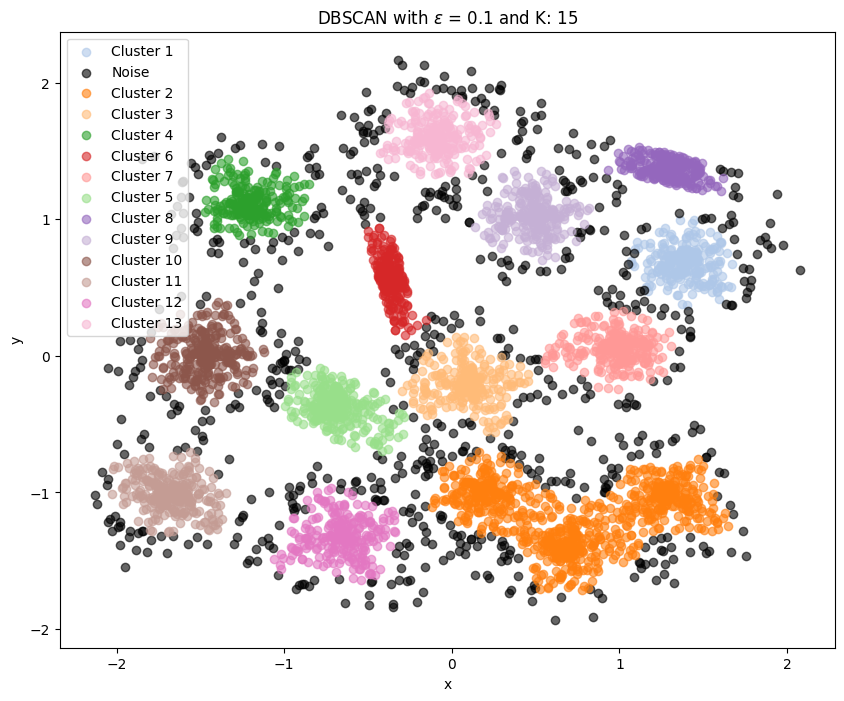

In [18]:
eps, K, clusters = models[19]
plot_clusters(clusters,eps,K)